In [17]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.style as style
from decimal import Decimal
import AnOxPePred_funcs as AOf
from importlib import reload

In [266]:
data_path = 'Data'
result_path = 'Result'
data_info = pd.read_csv(os.path.join(result_path, '03_Data_Info.csv'), index_col=0)
AO_kNN = pd.read_csv(os.path.join(result_path, '04_kNN_results.csv'), index_col=0)
AO_p60_pred = pd.read_csv(os.path.join(result_path,'04_AO_p60_results.csv'), index_col=0)
AO_p70_pred = pd.read_csv(os.path.join(result_path,'04_AO_p60_results.csv'), index_col=0)
AO_p80_pred = pd.read_csv(os.path.join(result_path,'04_AO_p60_results.csv'), index_col=0)
AO_p90_pred = pd.read_csv(os.path.join(result_path,'04_AO_p60_results.csv'), index_col=0)
AO_db = pd.read_csv(os.path.join(data_path, '02_process_AO_db.csv'), index_col=0)
Rand_db = pd.read_csv(os.path.join(data_path, '02_random_AO_db.csv'), index_col=0)


used_color = sns.color_palette(palette='pastel')

## Visualize dataset

In [251]:
scav_seq = dataset.query('FRS=="1"').Sequence
chel_seq = dataset.query('Chelator=="1"').Sequence
nega_seq = dataset.query('Chelator=="0"').query('FRS=="0"').Sequence
rand_seq = randomset.Sequence

In [273]:
xs_axis, ys_axis = np.unique(scav_seq.apply(len).values, return_counts=True)
xc_axis, yc_axis = np.unique(chel_seq.apply(len).values, return_counts=True)
custom_bins = [[2],[3],[4],[5],range(6,11),range(11,16),range(16,31)]
new_x = ["2'mers","3'mers", "4'mers", "5'mers", "6-10'mers", "11-15'mers","16-30'mers"]

new_ys = AOf.re_bin(xs_axis, ys_axis, custom_bins)
new_yc = AOf.re_bin(xc_axis, yc_axis, custom_bins)

## Benchmark dataset

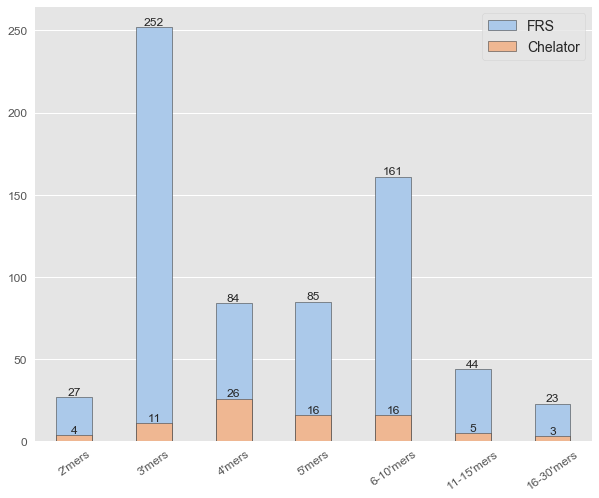

In [274]:
style.use('ggplot')
plt.figure(figsize=(10, 8))

ax = sns.barplot(new_x, new_ys, color=used_color[0], label='FRS', edgecolor=".2")
ax = sns.barplot(new_x, new_yc, color=used_color[1], label='Chelator', edgecolor=".2")


plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=14)
AOf.change_width(ax, .45)
leg = ax.legend(frameon=True)

# xticks
sns.color_palette(palette='colorblind', n_colors=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)

# Numbers above
xsis = [0 + i for i in range(len(new_ys))]
[plt.text(xsis[i], new_ys[i], new_ys[i], ha='center', va='bottom', fontsize=12) for i, val in enumerate(xsis)]
xsis = [0 + i for i in range(len(new_yc))]
[plt.text(xsis[i], new_yc[i], new_yc[i], ha='center', va='bottom', fontsize=12) for i, val in enumerate(xsis)] 

plt.savefig(os.path.join(result_path,'Figure-3.svg'), format='svg')

plt.show()

## Dataset composition

In [254]:
baseline_comp = np.array([8.25,1.37,5.45,6.75,3.86,7.07,2.27,5.96,5.84,9.66,2.42,4.06,4.7,3.93,5.53,6.56,5.34,6.87,1.08,2.92])/100

x_axis, scav_comp= np.unique(list(''.join(scav_seq.values)), return_counts=True)
_, chel_comp = np.unique(list(''.join(chel_seq.values)), return_counts=True)
_, nega_comp = np.unique(list(''.join(nega_seq.values)), return_counts=True)
_, rand_comp = np.unique(list(''.join(rand_seq.values)), return_counts=True)

scav_dif = (((scav_comp/scav_comp.sum())-baseline_comp)/baseline_comp)*100
chel_dif = (((chel_comp/chel_comp.sum())-baseline_comp)/baseline_comp)*100
nega_dif = (((nega_comp/nega_comp.sum())-baseline_comp)/baseline_comp)*100
rand_dif = (((rand_comp/rand_comp.sum())-baseline_comp)/baseline_comp)*100

In [255]:
tmp_df1 = pd.DataFrame(zip(scav_dif, x_axis), columns=['vals','Residues'])
tmp_df1['Property'] = 'FRS'
tmp_df2 = pd.DataFrame(zip(chel_dif, x_axis), columns=['vals','Residues'])
tmp_df2['Property'] = 'Chelator'
tmp_df3 = pd.DataFrame(zip(nega_dif, x_axis), columns=['vals','Residues'])
tmp_df3['Property'] = 'Negative'
tmp_df4 = pd.DataFrame(zip(rand_dif, x_axis), columns=['vals','Residues'])
tmp_df4['Property'] = 'Random'
tmp_df = pd.concat([tmp_df1, tmp_df2, tmp_df3, tmp_df4])

In [256]:
reload(AOf)
scav_pvals = AOf.if_pval(scav_comp, baseline_comp, 0.01)
chel_pvals = AOf.if_pval(chel_comp, baseline_comp, 0.01)
nega_pvals = AOf.if_pval(nega_comp, baseline_comp, 0.01)
rand_pvals = AOf.if_pval(rand_comp, baseline_comp, 0.01)

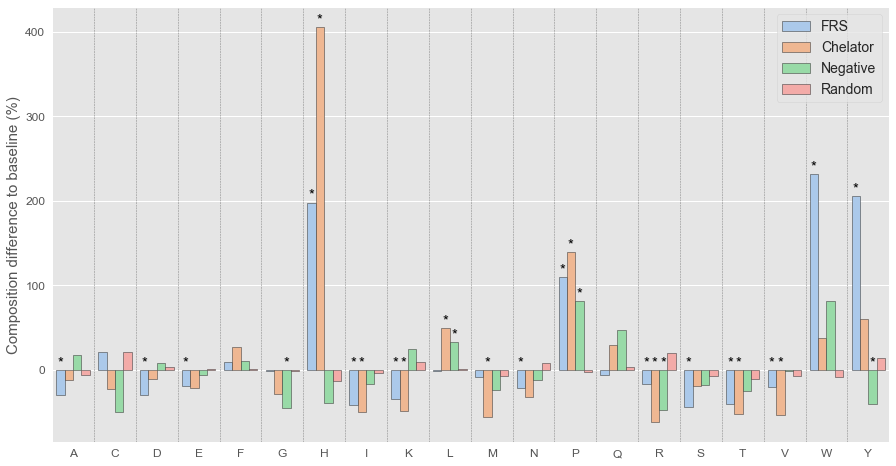

In [367]:
style.use('ggplot')
fig = plt.figure(figsize=(15, 8))
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=14)
cp = sns.barplot(data=tmp_df,
                x='Residues',
                 y='vals',
                hue='Property',
                palette={'FRS':used_color[0], 'Chelator':used_color[1], 'Negative':used_color[2], 'Random':used_color[3]},
                edgecolor=".2")

scavs_ = tmp_df.query("Property=='FRS'").vals.values
scavs_ = np.where(scavs_ < 0, 0, scavs_)
xsis = [-0.305 + i for i in range(20)]
[plt.text(xsis[i], scavs_[i], "*", ha='center', va='bottom', color='k', fontsize=15) for i, val in enumerate(xsis) if not scav_pvals[i]]
       
chel_ = tmp_df.query("Property=='Chelator'").vals.values
chel_ = np.where(chel_ < 0, 0, chel_)
xsis = [-0.105 + i for i in range(20)]
[plt.text(xsis[i], chel_[i], "*", ha='center', va='bottom', color='k', fontsize=15) for i, val in enumerate(xsis) if not chel_pvals[i]]     

        
neg_ = tmp_df.query("Property=='Negative'").vals.values
neg_ = np.where(neg_ < 0, 0, neg_)
xsis = [0.105 + i for i in range(20)]
[plt.text(xsis[i], neg_[i], "*", ha='center', va='bottom', color='k', fontsize=15) for i, val in enumerate(xsis) if not nega_pvals[i]]

ran_ = tmp_df.query("Property=='Random'").vals.values       
ran_ = np.where(ran_ < 0, 0, ran_)
xsis = [0.305 + i for i in range(20)]
[plt.text(xsis[i], ran_[i], "*", ha='center', va='bottom', color='k', fontsize=15) for i, val in enumerate(xsis) if not rand_pvals[i]] 

plt.ylabel('Composition difference to baseline (%)')
plt.xlabel('')
plt.legend(title="", frameon=True)

[plt.axvline(x=i,ls='--', color='grey', lw=.5) for i in np.arange(0.5,20.5,1)]

plt.savefig(os.path.join(result_path,'Figure-4.svg'), format='svg')

# line betweens residues

## Comparison of different thresholds

In [286]:
AO_mcc = pd.concat([AO_p60_pred.iloc[:,[2]],AO_p70_pred.iloc[:,[2]],AO_p80_pred.iloc[:,[2]],AO_p90_pred.iloc[:,[2]]],axis=1)
AO_mcc.columns = ['60%', '70%', '80%', '90%']

In [276]:
comparison_df = pd.concat([data_info,AO_kNN.iloc[:,[2]].T],axis=0)
comparison_df.columns = ['60%', '70%', '80%', '90%']

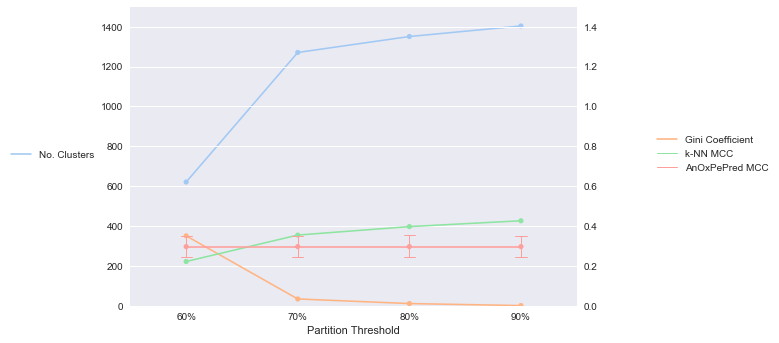

In [398]:
style.use('seaborn')
ax1 = sns.pointplot(data=comparison_df.loc[['Clusters'],:], color=used_color[0],scale=0.5, errwidth=1)
ax2 = plt.twinx()
plt1 = sns.pointplot(data=comparison_df.loc[['Gini'],:], color=used_color[1],scale=0.5, errwidth=1, ax=ax2, )
plt2 = sns.pointplot(data=comparison_df.loc[['0.5_MCC'],:], color=used_color[2],scale=0.5, errwidth=1, ax=ax2)
plt3 = sns.pointplot(data=AO_mcc, color=used_color[3],scale=0.5, errwidth=1, capsize=0.1, ax=ax2)


lines1 = ax1.get_lines()
lines2 = ax2.get_lines()
ax1.legend([lines1[0]], ['No. Clusters'], loc='mid left',bbox_to_anchor=(-.06, .55))
ax2.legend((lines2[0],lines2[6],lines2[14]),('Gini Coefficient', 'k-NN MCC', 'AnOxPePred MCC'), 
           loc='mid right', bbox_to_anchor=(1.45, .6))



ax1.set_xlabel('Partition Threshold')
ax2.set_ylim([0,1.5])
ax1.set_ylim([0,1500])

plt.savefig(os.path.join(result_path,'Figure-5.svg'), format='svg')

plt.show()

## Compare k-NN with AnOxPePred

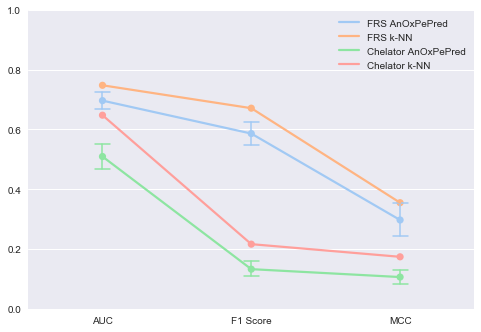

In [364]:
style.use('seaborn')
ax = sns.pointplot(data=AO_p70_pred.iloc[:,[0,1,2]], color=used_color[0],scale=0.7, errwidth=1.5, capsize=0.1)
ax = sns.pointplot(data=pd.DataFrame(AO_kNN.loc['AO_p70'].iloc[[0,1,2,]]).T, color=used_color[1],scale=0.7)
ax = sns.pointplot(data=AO_p70_pred.iloc[:,[9,10,11]], color=used_color[2],scale=0.7, errwidth=1.5, capsize=0.1)
ax = sns.pointplot(data=pd.DataFrame(AO_kNN.loc['AO_p70'].iloc[[9,10,11]]).T, color=used_color[3],scale=0.7)

lines = ax.get_lines()
ax.legend((lines[0],lines[10],lines[14],lines[24]),('FRS AnOxPePred','FRS k-NN','Chelator AnOxPePred','Chelator k-NN'))

plt.xticks(plt.xticks()[0], ['AUC','F1 Score','MCC'])
ax.set_ylim([0,1])

plt.savefig(os.path.join(result_path,'Figure-6.svg'), format='svg')

plt.show()